In [44]:
import matplotlib.pyplot as plt
from mplsoccer import Pitch

In [2]:
!kaggle datasets download -d hubertsidorowicz/football-players-stats-2024-2025

Dataset URL: https://www.kaggle.com/datasets/hubertsidorowicz/football-players-stats-2024-2025
License(s): MIT
 95%|█████████████████████████████████████▏ | 1.00M/1.05M [00:01<00:00, 842kB/s]
100%|███████████████████████████████████████| 1.05M/1.05M [00:01<00:00, 869kB/s]


In [5]:
# import zipfile

# with zipfile.ZipFile('football-players-stats-2024-2025.zip', 'r') as zip_ref:
#     zip_ref.extractall('football_stats')

In [31]:
df.head()


,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Att_(GK),Thr,Launch%,AvgLen,Opp,Stp,Stp%,#OPA,#OPA/90,AvgDist
0,1,Max Aarons,eng ENG,DF,Bournemouth,eng Premier League,25.0,2000.0,3,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Max Aarons,eng ENG,MF,Valencia,es La Liga,25.0,2000.0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Rodrigo Abajas,es ESP,DF,Valencia,es La Liga,21.0,2003.0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,James Abankwah,ie IRL,"DF,MF",Udinese,it Serie A,21.0,2004.0,6,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Keyliane Abdallah,fr FRA,FW,Marseille,fr Ligue 1,18.0,2006.0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
import pandas as pd

# Load the dataset
file_path = 'football_stats/players_data-2024_2025.csv' 
df = pd.read_csv(file_path)

print(df.info())

print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2657 entries, 0 to 2656
Columns: 267 entries, Rk to AvgDist
dtypes: float64(106), int64(116), object(45)
memory usage: 5.4+ MB
None
   Rk             Player   Nation    Pos        Squad                Comp  \
0   1         Max Aarons  eng ENG     DF  Bournemouth  eng Premier League   
1   2         Max Aarons  eng ENG     MF     Valencia          es La Liga   
2   3     Rodrigo Abajas   es ESP     DF     Valencia          es La Liga   
3   4     James Abankwah   ie IRL  DF,MF      Udinese          it Serie A   
4   5  Keyliane Abdallah   fr FRA     FW    Marseille          fr Ligue 1   

    Age    Born  MP  Starts  ...  Att (GK)  Thr  Launch%  AvgLen  Opp  Stp  \
0  25.0  2000.0   3       1  ...       NaN  NaN      NaN     NaN  NaN  NaN   
1  25.0  2000.0   1       0  ...       NaN  NaN      NaN     NaN  NaN  NaN   
2  21.0  2003.0   1       1  ...       NaN  NaN      NaN     NaN  NaN  NaN   
3  21.0  2004.0   6       0  ...       NaN 

In [9]:
missing_values = df.isnull().sum() / len(df) * 100
print(missing_values[missing_values > 0])  


Nation                    0.112909
Age                       0.150546
Born                      0.150546
Nation_stats_shooting     0.112909
Age_stats_shooting        0.150546
                           ...    
Stp                      93.225442
Stp%                     93.225442
#OPA                     93.225442
#OPA/90                  93.225442
AvgDist                  93.300715
Length: 106, dtype: float64


In [10]:
df.columns = df.columns.str.replace(' ', '_').str.replace(r'\W', '')

print(df.columns)


Index(['Rk', 'Player', 'Nation', 'Pos', 'Squad', 'Comp', 'Age', 'Born', 'MP',
       'Starts',
       ...
       'Att_(GK)', 'Thr', 'Launch%', 'AvgLen', 'Opp', 'Stp', 'Stp%', '#OPA',
       '#OPA/90', 'AvgDist'],
      dtype='object', length=267)


In [12]:
top_scorers = df[['Player', 'Squad', 'Comp', 'Pos', 'Gls']].sort_values(by='Gls', ascending=False).head(10)
print(top_scorers)


                  Player            Squad                Comp Pos  Gls
2136       Mohamed Salah        Liverpool  eng Premier League  FW   21
1218          Harry Kane    Bayern Munich       de Bundesliga  FW   21
2041       Mateo Retegui         Atalanta          it Serie A  FW   20
1023      Erling Haaland  Manchester City  eng Premier League  FW   19
1378  Robert Lewandowski        Barcelona          es La Liga  FW   19
2592          Chris Wood  Nott'ham Forest  eng Premier League  FW   17
1126      Alexander Isak    Newcastle Utd  eng Premier League  FW   17
646      Ousmane Dembélé        Paris S-G          fr Ligue 1  FW   16
1568       Kylian Mbappé      Real Madrid          es La Liga  FW   16
1230          Moise Kean       Fiorentina          it Serie A  FW   15


In [13]:
top_assists = df[['Player', 'Squad', 'Comp', 'Pos', 'Ast']].sort_values(by='Ast', ascending=False).head(10)
print(top_assists)


                Player            Squad                Comp    Pos  Ast
2136     Mohamed Salah        Liverpool  eng Premier League     FW   13
2597      Lamine Yamal        Barcelona          es La Liga     FW   10
2062  Antonee Robinson           Fulham  eng Premier League     DF   10
2132       Bukayo Saka          Arsenal  eng Premier League  FW,MF   10
1515     Omar Marmoush   Eint Frankfurt       de Bundesliga     FW    9
2584     Florian Wirtz       Leverkusen       de Bundesliga     MF    9
768     Anthony Elanga  Nott'ham Forest  eng Premier League  FW,MF    8
2374      Nuno Tavares            Lazio          it Serie A     DF    8
2574    Iñaki Williams    Athletic Club          es La Liga  FW,MF    7
978     Vincenzo Grifo         Freiburg       de Bundesliga  FW,MF    7


In [14]:
top_defenders = df[['Player', 'Squad', 'Comp', 'Pos', 'Tkl']].sort_values(by='Tkl', ascending=False).head(10)
print(top_defenders)


                  Player           Squad                Comp    Pos  Tkl
1694        Daniel Muñoz  Crystal Palace  eng Premier League     DF   86
858      Morten Frendrup           Genoa          it Serie A     MF   78
1073      Omar El Hilali        Espanyol          es La Liga     DF   77
2176       Andrey Santos      Strasbourg          fr Ligue 1     MF   74
883   Idrissa Gana Gueye         Everton  eng Premier League     MF   74
314          Tom Bischof      Hoffenheim       de Bundesliga  MF,FW   73
939           João Gomes          Wolves  eng Premier League     MF   71
404       Moisés Caicedo         Chelsea  eng Premier League     MF   71
1563   Noussair Mazraoui  Manchester Utd  eng Premier League     DF   70
131         Jon Aramburu   Real Sociedad          es La Liga     DF   70


/tmp/ipykernel_30621/396794882.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_scorers['Gls'], y=top_scorers['Player'], palette='Blues_r')


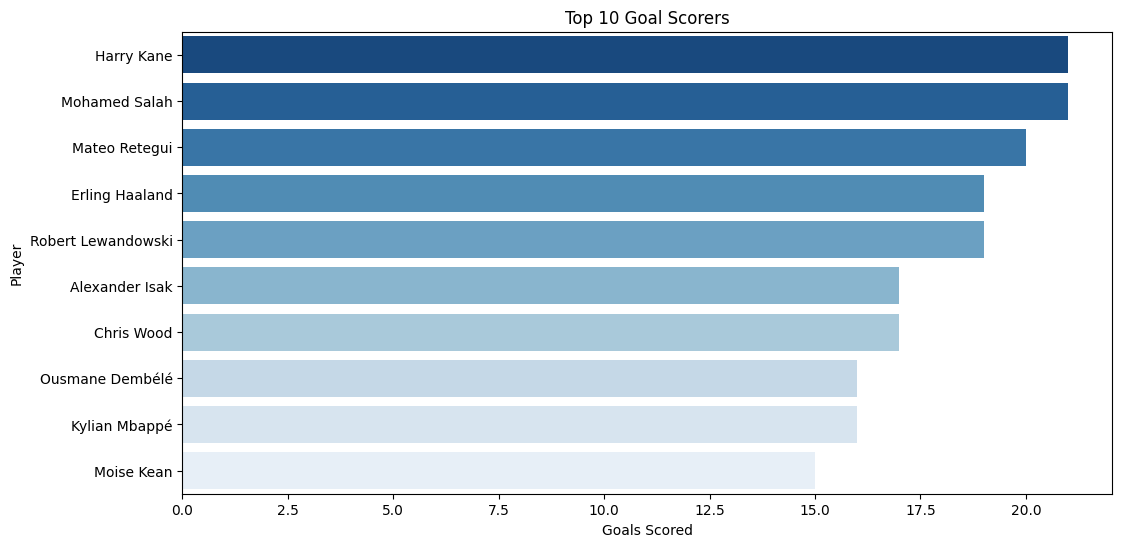

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select top 10 goal scorers
top_scorers = df.nlargest(10, 'Gls')

plt.figure(figsize=(12, 6))
sns.barplot(x=top_scorers['Gls'], y=top_scorers['Player'], palette='Blues_r')
plt.xlabel('Goals Scored')
plt.ylabel('Player')
plt.title('Top 10 Goal Scorers')
plt.show()


/tmp/ipykernel_30621/2875356201.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_assists['Ast'], y=top_assists['Player'], palette='Greens_r')


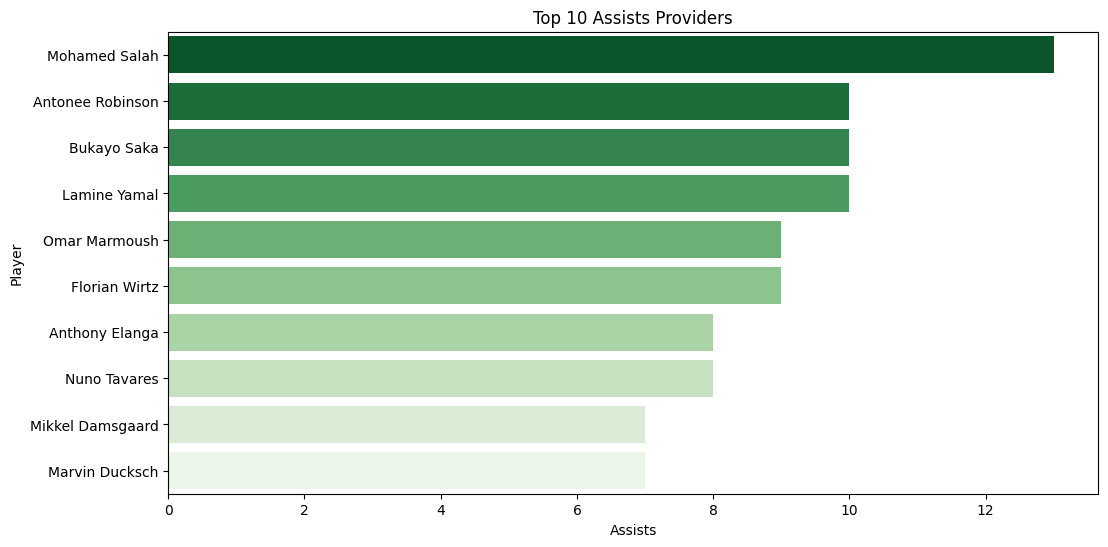

In [21]:
# Select top 10 assist providers
top_assists = df.nlargest(10, 'Ast')

plt.figure(figsize=(12, 6))
sns.barplot(x=top_assists['Ast'], y=top_assists['Player'], palette='Greens_r')
plt.xlabel('Assists')
plt.ylabel('Player')
plt.title('Top 10 Assists Providers')
plt.show()


# Building a “Best XI” Team
Defining the Formation (4-3-3)
We will pick:
 ### Formation 433
1. 1 Goalkeeper ('GK')
4. 4 Defenders ('DF')
3. 3 Midfielders ('MF')
3. 3 Forwards ('FW')

In [57]:
# Select Best XI based on highest stats for each position
best_gk = df[df['Pos'].str.contains('GK')].nlargest(1, 'Save%')
best_defenders = df[df['Pos'].str.contains('DF')].nlargest(4, 'Tkl')
best_midfielders = df[df['Pos'].str.contains('MF')].nlargest(3, 'Ast')
best_forwards = df[df['Pos'].str.contains('FW')].nlargest(3, 'Gls')

# Combine all players into Best XI
best_xi = pd.concat([best_gk, best_defenders, best_midfielders, best_forwards])
print(best_xi[['Player', 'Pos', 'Squad', 'Gls', 'Ast', 'Tkl', 'Save%']])


                 Player    Pos            Squad  Gls  Ast  Tkl  Save%
1149    Vitezslav Jaros     GK        Liverpool    0    0    0  100.0
1694       Daniel Muñoz     DF   Crystal Palace    2    3   86    NaN
1073     Omar El Hilali     DF         Espanyol    0    2   77    NaN
131        Jon Aramburu     DF    Real Sociedad    0    0   70    NaN
1563  Noussair Mazraoui     DF   Manchester Utd    0    1   70    NaN
2132        Bukayo Saka  FW,MF          Arsenal    5   10   22    NaN
2584      Florian Wirtz     MF       Leverkusen    9    9   26    NaN
768      Anthony Elanga  FW,MF  Nott'ham Forest    3    8   12    NaN
1218         Harry Kane     FW    Bayern Munich   21    7    6    NaN
2136      Mohamed Salah     FW        Liverpool   21   13   13    NaN
2041      Mateo Retegui     FW         Atalanta   20    3    8    NaN


### The Best XI 433

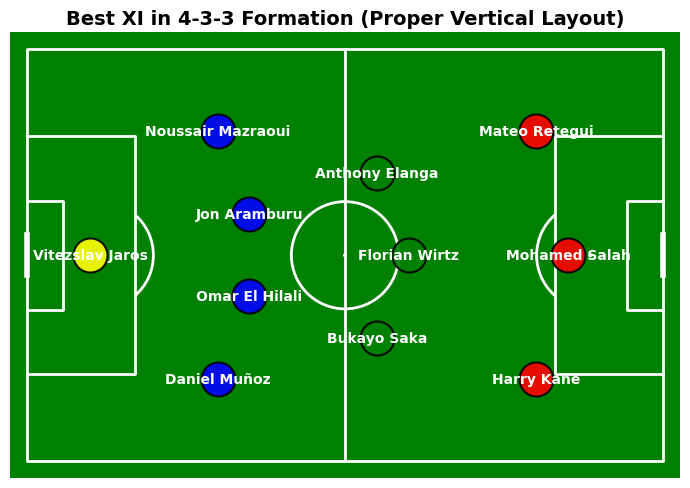

In [45]:

pitch = Pitch(pitch_type='opta', pitch_color='green', line_color='white')
fig, ax = pitch.draw(figsize=(7, 10))  # Adjusted for a vertical layout

# **Proper 4-3-3 Formation (for Vertical Pitch)**
positions_433 = {
    'GK': (10, 50),  # Goalkeeper

    'LB': (30, 20), 'CB1': (35, 40), 'CB2': (35, 60), 'RB': (30, 80),  # Defenders

    'LM': (55, 30), 'CM': (60, 50), 'RM': (55, 70),  # Midfielders

    'LW': (80, 20), 'ST': (85, 50), 'RW': (80, 80)  # Forwards
}

best_xi_players = {
    'GK': best_gk.iloc[0]['Player'],
    'LB': best_defenders.iloc[0]['Player'],
    'CB1': best_defenders.iloc[1]['Player'],
    'CB2': best_defenders.iloc[2]['Player'],
    'RB': best_defenders.iloc[3]['Player'],
    'LM': best_midfielders.iloc[0]['Player'],
    'CM': best_midfielders.iloc[1]['Player'],
    'RM': best_midfielders.iloc[2]['Player'],
    'LW': best_forwards.iloc[0]['Player'],
    'ST': best_forwards.iloc[1]['Player'],
    'RW': best_forwards.iloc[2]['Player']
}

position_colors = {
    'GK': 'yellow',
    'LB': 'blue', 'CB1': 'blue', 'CB2': 'blue', 'RB': 'blue',
    'LM': 'green', 'CM': 'green', 'RM': 'green',
    'LW': 'red', 'ST': 'red', 'RW': 'red'
}

for pos, (x, y) in positions_433.items():  # x = horizontal, y = vertical
    pitch.scatter(x, y, ax=ax, c=position_colors[pos], s=600, edgecolors='black', linewidth=1.5, alpha=0.9)
    ax.text(x, y, best_xi_players[pos], ha='center', va='center', fontsize=10, color='white', fontweight='bold')

plt.title('Best XI in 4-3-3 Formation (Proper Vertical Layout)', fontsize=14, fontweight='bold')

plt.show()


### Best XI for 234
AKA the early Pyramid Formation

AKA the 2024/2025 Bayren Munich Formation

                  Player    Pos            Squad  Gls  Ast  Tkl  Save%
1149     Vitezslav Jaros     GK        Liverpool    0    0    0  100.0
1694        Daniel Muñoz     DF   Crystal Palace    2    3   86    NaN
1073      Omar El Hilali     DF         Espanyol    0    2   77    NaN
2132         Bukayo Saka  FW,MF          Arsenal    5   10   22    NaN
2584       Florian Wirtz     MF       Leverkusen    9    9   26    NaN
768       Anthony Elanga  FW,MF  Nott'ham Forest    3    8   12    NaN
1218          Harry Kane     FW    Bayern Munich   21    7    6    NaN
2136       Mohamed Salah     FW        Liverpool   21   13   13    NaN
2041       Mateo Retegui     FW         Atalanta   20    3    8    NaN
1023      Erling Haaland     FW  Manchester City   19    2    7    NaN
1378  Robert Lewandowski     FW        Barcelona   19    2    7    NaN


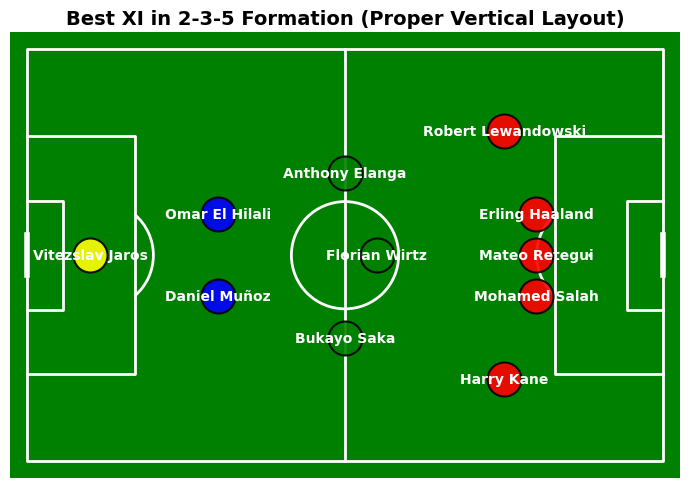

In [56]:
# Select Best XI based on highest stats for each position
best_gk = df[df['Pos'].str.contains('GK')].nlargest(1, 'Save%')
best_defenders = df[df['Pos'].str.contains('DF')].nlargest(2, 'Tkl')
best_midfielders = df[df['Pos'].str.contains('MF')].nlargest(3, 'Ast')
best_forwards = df[df['Pos'].str.contains('FW')].nlargest(5, 'Gls')

# Combine all players into Best XI
best_xi = pd.concat([best_gk, best_defenders, best_midfielders, best_forwards])
print(best_xi[['Player', 'Pos', 'Squad', 'Gls', 'Ast', 'Tkl', 'Save%']])

from mplsoccer import Pitch
import matplotlib.pyplot as plt

pitch = Pitch(pitch_type='opta', pitch_color='green', line_color='white')
fig, ax = pitch.draw(figsize=(7, 10))

positions_235 = {
    'GK':  (10, 50),
    'CB1': (30, 40),
    'CB2': (30, 60),
    'LM':  (50, 30),
    'CM':  (55, 50),
    'RM':  (50, 70),
    'LW':  (75, 20),
    'CF1': (80, 40),
    'CF2': (80, 50),
    'CF3': (80, 60),
    'RW':  (75, 80)
}

if len(best_forwards) < 5:
    print("Not enough forwards for the 2-3-5 formation!")
    
best_xi_players = {
    'GK':  best_gk.iloc[0]['Player'],
    'CB1': best_defenders.iloc[0]['Player'],
    'CB2': best_defenders.iloc[1]['Player'],
    'LM':  best_midfielders.iloc[0]['Player'],
    'CM':  best_midfielders.iloc[1]['Player'],
    'RM':  best_midfielders.iloc[2]['Player'],
    'LW':  best_forwards.iloc[0]['Player'],
    'CF1': best_forwards.iloc[1]['Player'],
    'CF2': best_forwards.iloc[2]['Player'],
    'CF3': best_forwards.iloc[3]['Player'],
    'RW':  best_forwards.iloc[4]['Player']
}

position_colors = {
    'GK':  'yellow',
    'CB1': 'blue', 'CB2': 'blue',
    'LM':  'green', 'CM': 'green', 'RM': 'green',
    'LW':  'red', 'CF1': 'red', 'CF2': 'red', 'CF3': 'red', 'RW': 'red'
}

for pos, (x, y) in positions_235.items():
    pitch.scatter(x, y, ax=ax, c=position_colors[pos], s=600, edgecolors='black', linewidth=1.5, alpha=0.9)
    ax.text(x, y, best_xi_players[pos], ha='center', va='center', fontsize=10, color='white', fontweight='bold')

plt.title('Best XI in 2-3-5 Formation (Proper Vertical Layout)', fontsize=14, fontweight='bold')
plt.show()
